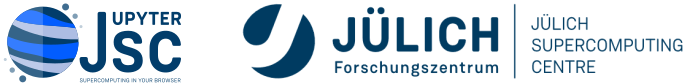
<h5 style="text-align: right">Author: <a href="mailto:a.grosch@fz-juelich.de?subject=Jupyter-JSC%20documentation">Alice Grosch</a></h5>  
<h5><a href="../index.ipynb">Index</a></h5>
<h1 style="text-align: center">Slurm Wrapped Kernels</h1>  

## Work on a compute node from a login node!

* [Background](#Background)
* [Slurm wrapped kernels](#Slurm-wrapped-kernels)
    * [What is a slurm wrapped kernel?](#What-is-a-slurm-wrapped-kernel?)
    * [Creating a new kernel allocation](#Creating-a-new-kernel-allocation)
    * [Getting information about your kernels and kernel allocations](#Getting-information-about-your-kernels-and-kernel-allocations)
    * [Using an existing allocation](#Using-an-existing-allocation)
    * [Modifying an existing allocation](#Modifying-an-existing-allocation)
* [Restarting a slurm wrapped kernel](#Restarting-a-slurm-wrapped-kernel)
* [When and how will my kernel allocation end?](#When-and-how-will-my-kernel-allocation-end?)
    * [Manually killing a kernel allocation](#Manually-killing-a-kernel-allocation)

### Background
When you use a Jupyter notebook, your code is executed by a kernel. Jupyter's [documentation](https://docs.jupyter.org/en/latest/projects/kernels.html#kernels) defines kernels as "programming language specific processes that run independently and interact with the Jupyter Applications and their user interfaces." In simpler terms, a kernel executes code from a front-end process - most of the time your Jupyter notebook.

### Slurm wrapped kernels
Usually, your kernel runs where your Jupyter notebook runs. So if you start a notebook on the login node, a corresponding kernel will be started on the login node also. 

Slurm wrapped kernels allow you to run kernels on compute nodes while you are on a login node. This has the advantage that when your allocation on the compute node(s) ends, only the kernel is stopped, but your JupyterLab server keeps running. You will only have to restart the kernel, not your entire JupyterLab instance. The picture below illustrates the difference between a notebook which uses a regular kernel such as ipykernel, and a notebook which uses the slurm wrapped version of the same kernel.

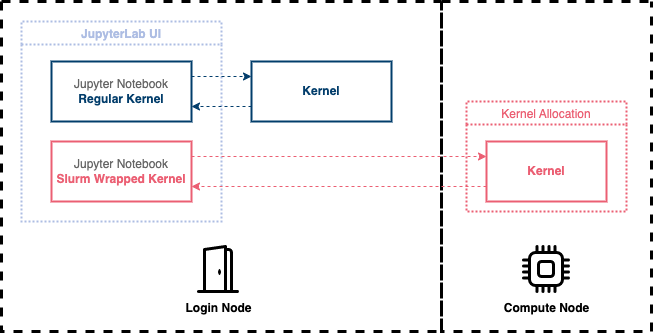


#### What is a slurm wrapped kernel?
A slurm wrapped kernel is the same as a regular kernel of any language. But instead of running where your notebook runs, it is started on a compute node via Slurm. As with regular job submissions, you need to configure the partition, runtime, number of nodes, etc. and **wait until your job has been allocated** to use the kernel (kernel allocation).


<div class="alert alert-danger">
Slurm wrapped kernels start on compute nodes. You have to wait until your requested resources have been allocated before you can use your kernel(s)!
</div>


You can configure your current kernel allocation in the sidebar by opening the "Slurm Wrapper" tab in the left sidebar and clicking the "Configure" button.

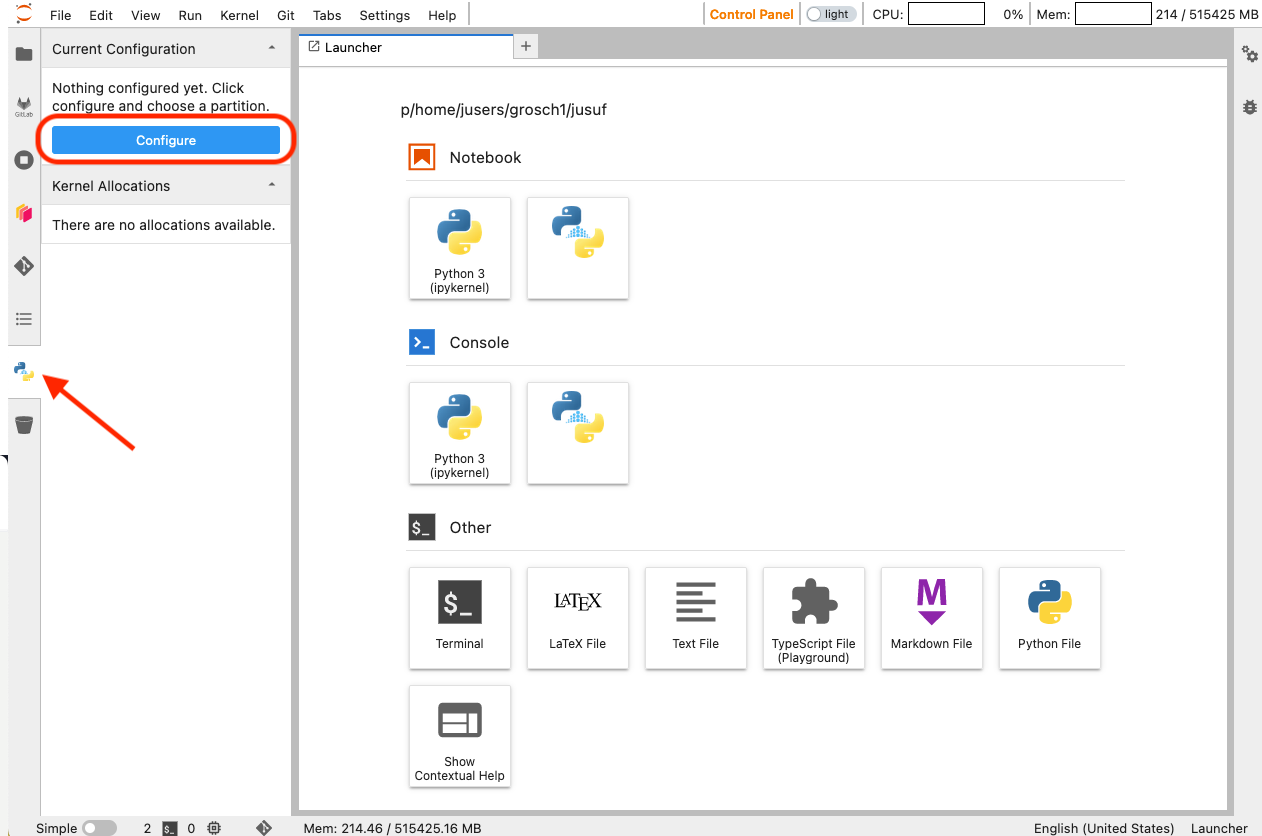


#### Creating a new kernel allocation
If there is no kernel allocation running, you only have the option to create a new configuration. Because no nodes have been allocated yet, you cannot select a specific node yet (`node = Any`). You must however select which kernel you want to start, the project and partition to use as well as the number of nodes, the runtime and if available, the number of GPUs and the reservation.

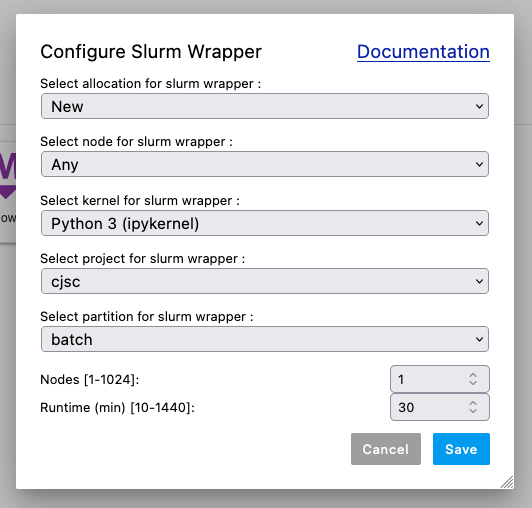

Once you have configured the resources you want, you will have to start a notebook using the "Slurm Wrapper" kernel to start your kernel allocation. You can do so either via the launcher (see picture below), or by switching the kernel of your existing notebook to the "Slurm Wrapper" kernel via the "Switch kernel" button in the upper right of the notebook interface.

<div class="alert alert-danger">
Your kernel allocation will only be started once you have started your first notebook using the "Slurm Wrapper" kernel.
</div>

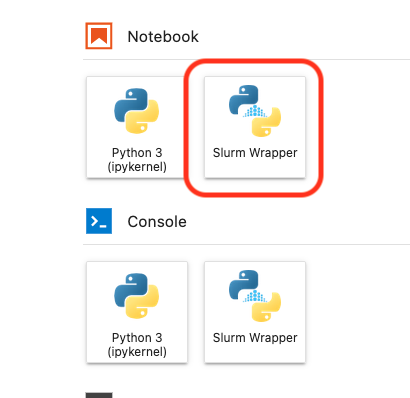


#### Getting information about your kernels and kernel allocations

##### Kernels
You can see the status of a kernel in the corresponding notebook in the upper right. A flash symbol like in the image below means your kernel is currently disconnected. This is also the status that will be shown when your kernel is waiting for its kernel allocation to start running. Once a kernel has connected, the symbol changes to a hollow circle and you are ready to use your notebook.

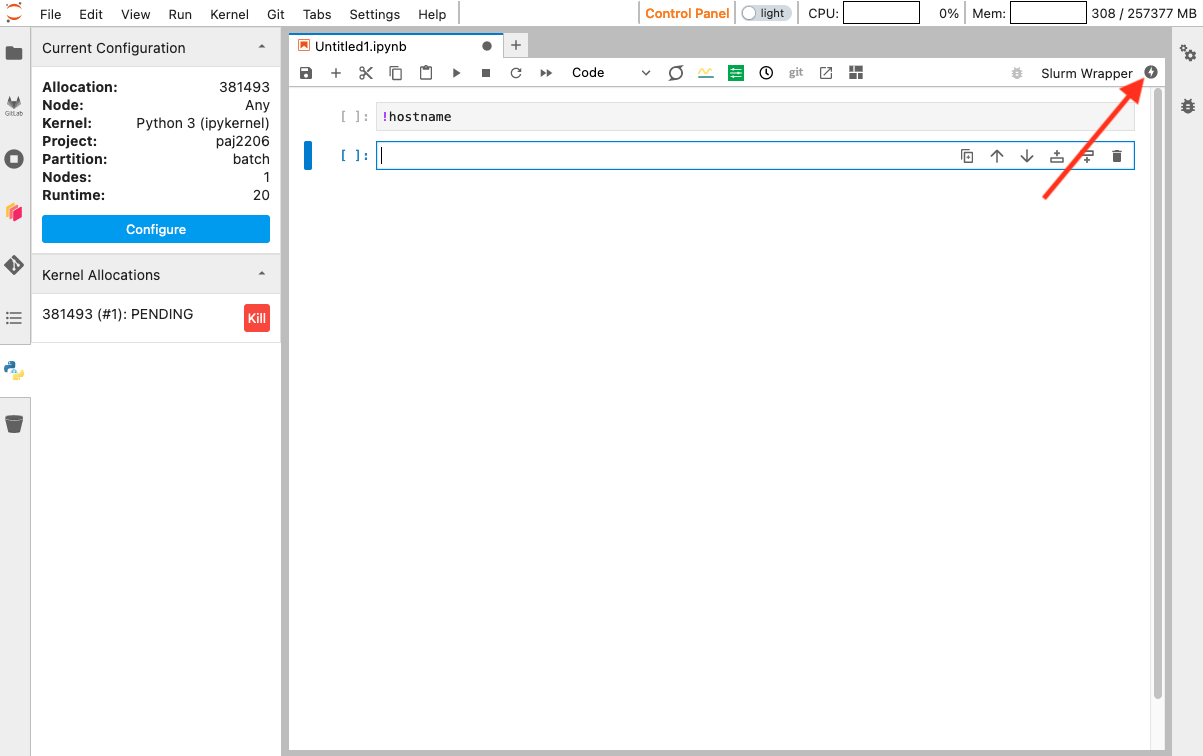


JupyterLab offers an overview of running terminals and kernels in the left sidebar (see picture below). There you can check which kernels are running and shut down any kernels using the "x" when hovering the notebook name. However, JupyterLab does not natively support stopping kernels which are in the process of starting and connecting. So as long as your kernel is waiting on its kernel allocation, you cannot shut it down via the regular JupyterLab interface in order to stop an allocation. 

<div class="alert alert-info">
To enable you to nevertheless cancel a kernel allocation, the "Kernel Allocations" section of the Slurm Wrapper sidebar tab has a "Kill" button next to each allocation. You can use it to cancel a kernel allocation no matter what its current state is. Be aware that once you have stopped all kernels using a certain kernel allocation, the allocation will be automatically killed after 10 seconds, see <a href="#When-and-how-will-my-kernel-allocation-end?">When and how will my kernel allocation end?</a>.
</div>


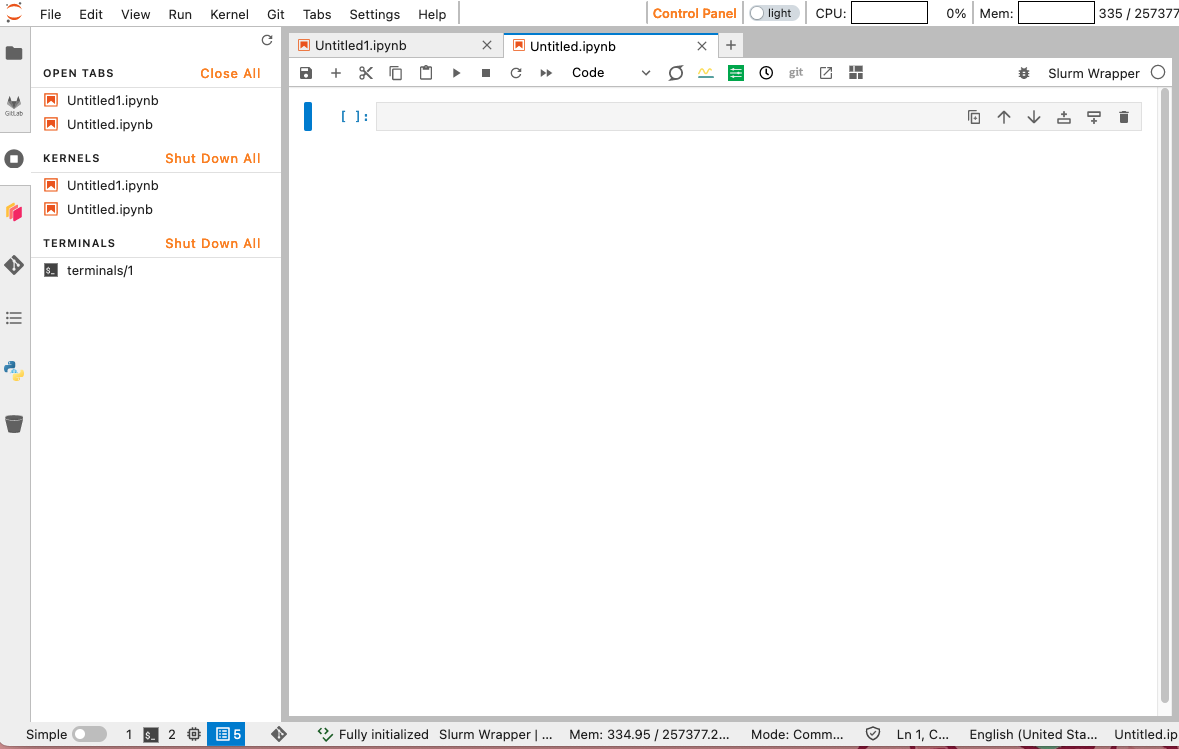


##### Kernel allocations
You can see your kernel allocations in the Slurm Wrapper tab under the "Kernel Allocations" section. Should you want more information about your kernel allocations, we have added the convenience command `slurm_watch` which can used on the command line.

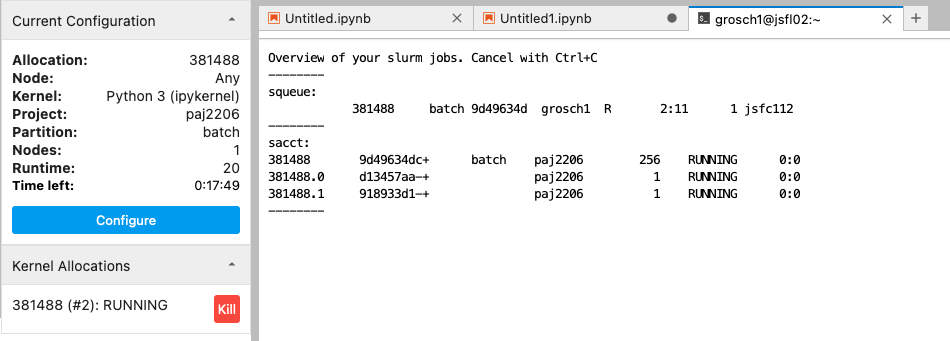

In the screenshot, there is one kernel allocation running with two kernels using it. This is represented in the sidebar via the number `2` behind the allocation id. Using `slurm_watch` in the terminal yields more information. The allocation id is `381488`. Each kernel has its own entry via the `.0` and `.1` suffix. If we would start a third kernel, an entry with the suffix `.2` would appear.


#### Using an existing allocation

Let's assume the case where we have started two different kernel allocations. In the left sidebar, you can check the status of the allocations. For instance in the picture below, the kernel allocation `381398` is already running. It has been allocated one compute node (not pictured) and one kernel is using it. The currently selected allocation `381405` is still starting up (`CONFIGURING`) with one kernel waiting to use it and requested two compute nodes on the batch partition. You can always check in the sidebar which kernel allocations are currently running or starting up (and you can stop them via the `kill` button) and which allocation is currently selected. 

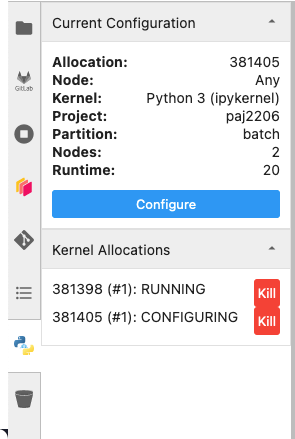

Any new "Slurm Wrapper" notebooks you start will use the current kernel allocation. So right now, a new notebook will wait on the currently selected `381405` allocation to start. If we want to use the `381398` allocation to get another notebook immediately without having to wait, we can click the "Configure" button and choose `381398` in the allocation dropdown and save that as our new configuration, then start the new kernel.

Once both kernel allocations are running, the kernel allocation section in the sidebar will update to reflect this:

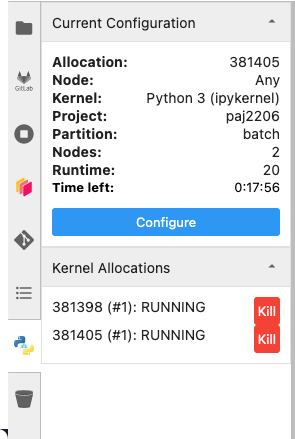

The number in brackets behind the allocation ID (e.g. `#1`) indicates that we have started exactly one kernel per allocation. Below is an illustration of the current state (kernel allocation 1 corresponds to `381405` with two compute nodes and allocation 2 to `381398` with one compute node):

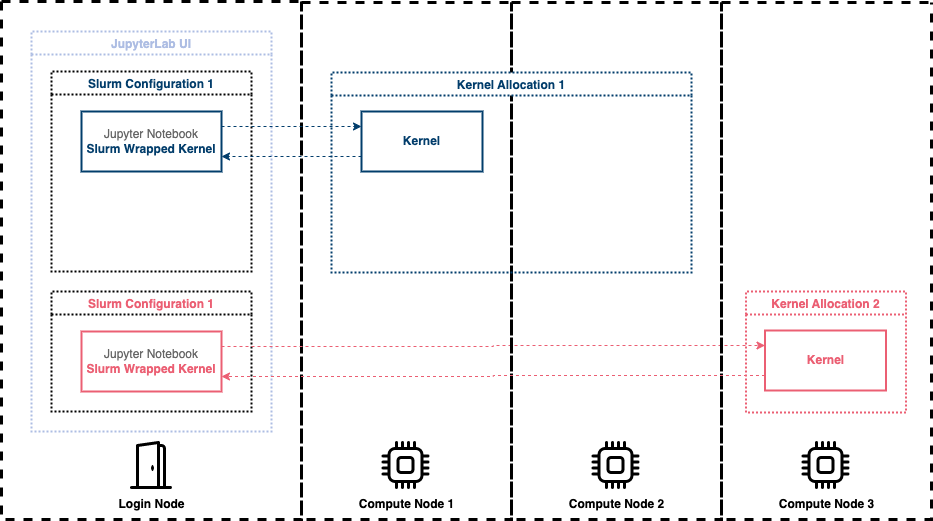

#### Modifying an existing allocation

Now let's image we want to start a second kernel with allocation 1 (or `381405`), but we explicitly want it to start on the currently unused node. First, we find out which node our already running notebook is using via the `!hostname` magic.

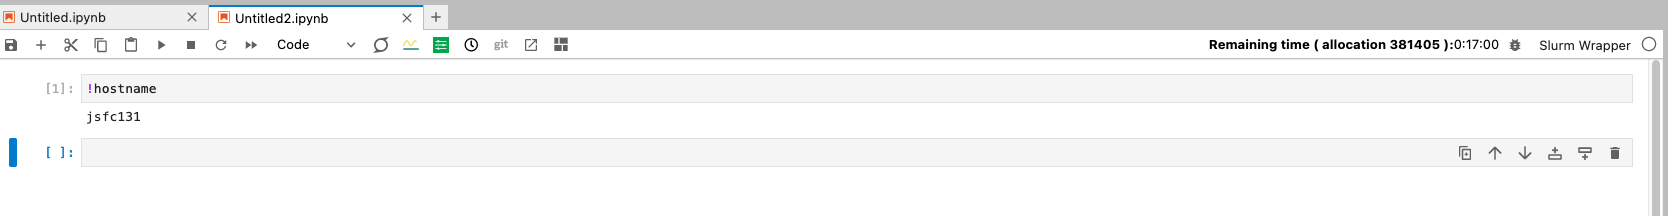

To start a second notebook on the other node, we click the "Configure" button and select the hitherto unused node, in this case `jsfc174`.

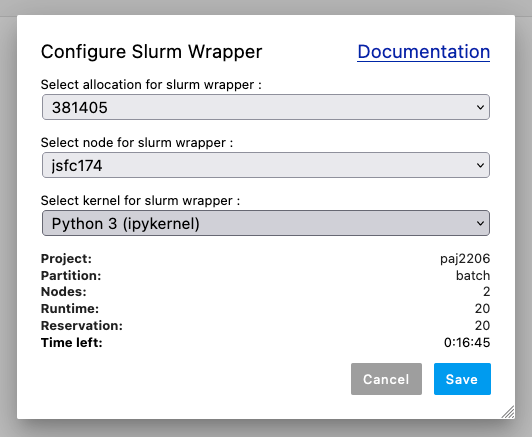

Once you start your second notebook with this configuration, it will start on the specified node and the number behind the allocation ID will update to `2`:

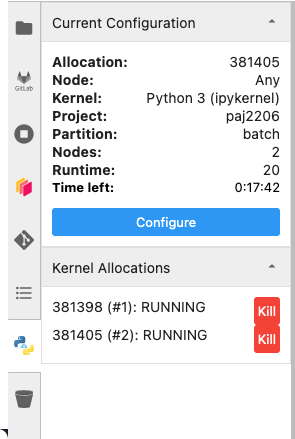

The current state now looks like this:

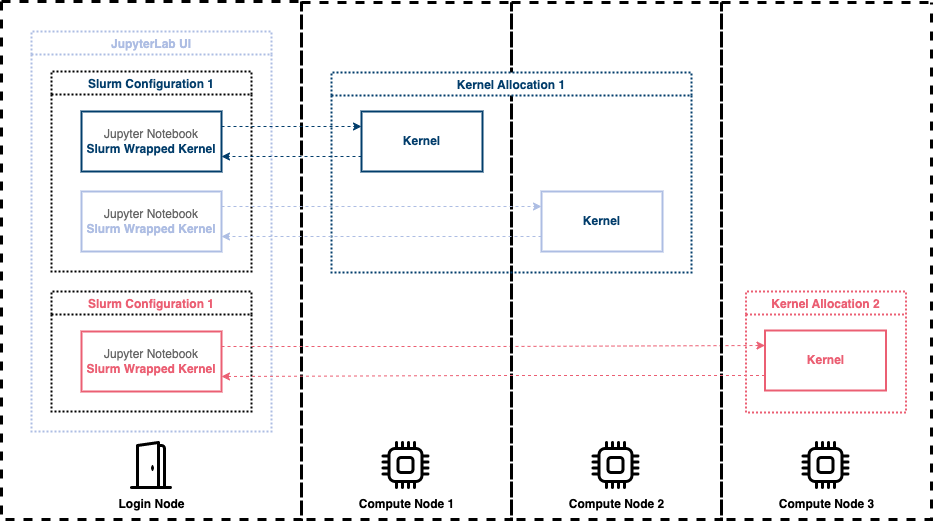


If we want to use kernel allocation 2 (or `381398`) again, we again have to click the "Configure" button and select it in the allocation dropdown. Because the resources for a running kernel allocation have already been allocated, you can only select the node on which your kernel should be started and which kernel should be started.

### Restarting a slurm wrapped kernel

You can manually restart a kernel. It will attempt to reuse the kernel allocation it was configured to use on its last start.

### When and how will my kernel allocation end?

In the sidebar and above your notebook you can find a timer showing you the remaining time of your kernel allocation. Once it reaches a runtime below 10 min, it will become red to make you aware that your kernel allocation is about to end.

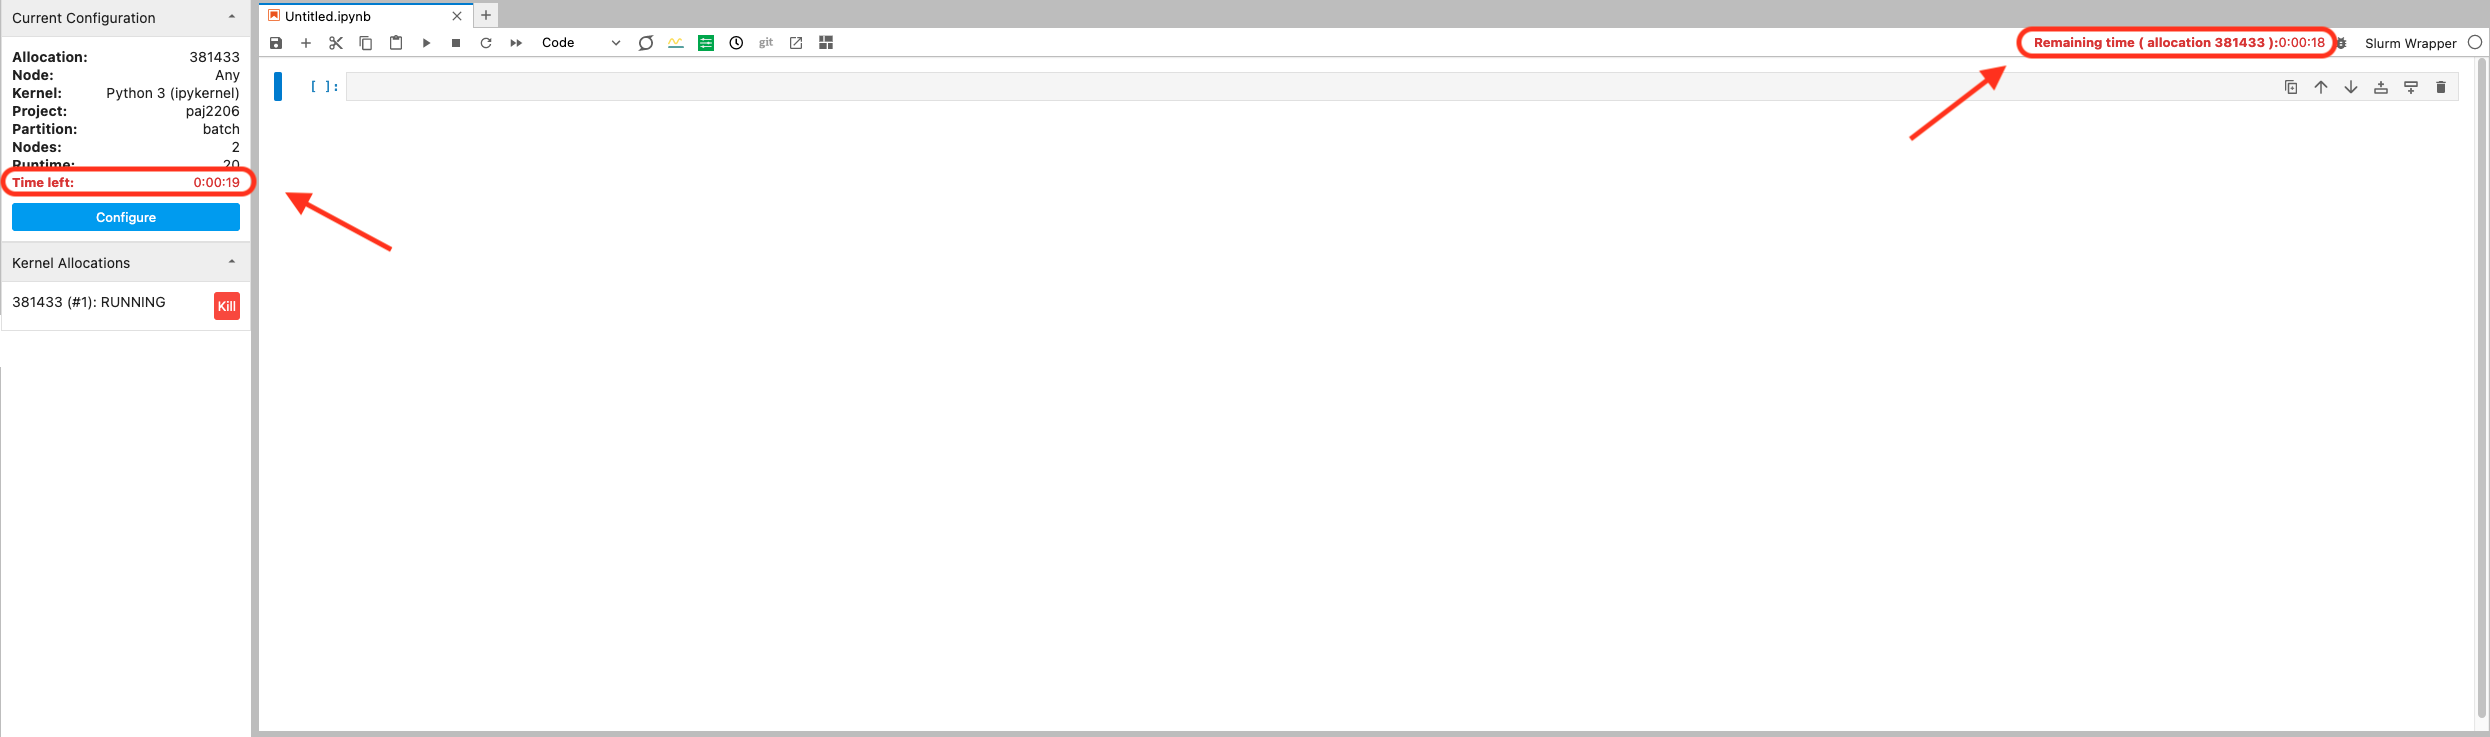

Once your allocation has ended, your kernel will be disconnected. Usually, a kernel is automatically restarted. However, in order to prevent unwanted use of computing resources, this is not the case for slurm wrapped kernels. While you will still see a popup saying that your kernel will restart automatically:

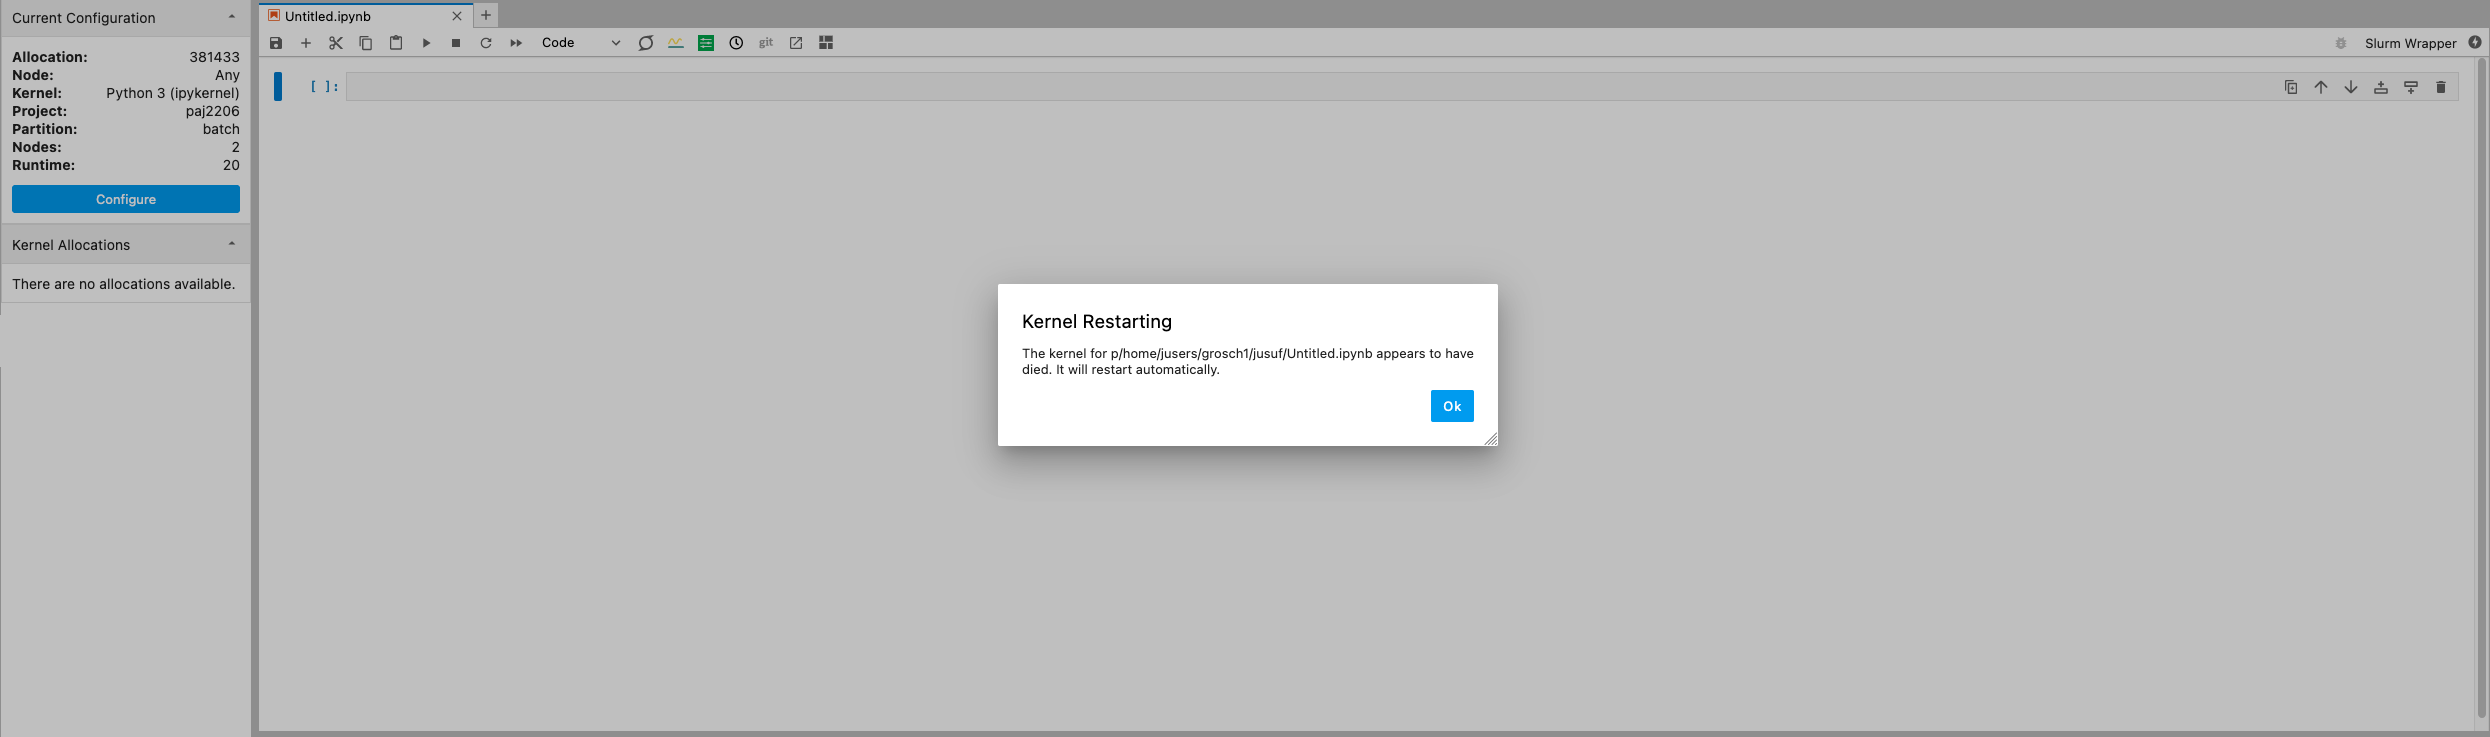

It will be followed by a second popup stating that you will have to configure a new allocation to restart your kernel:

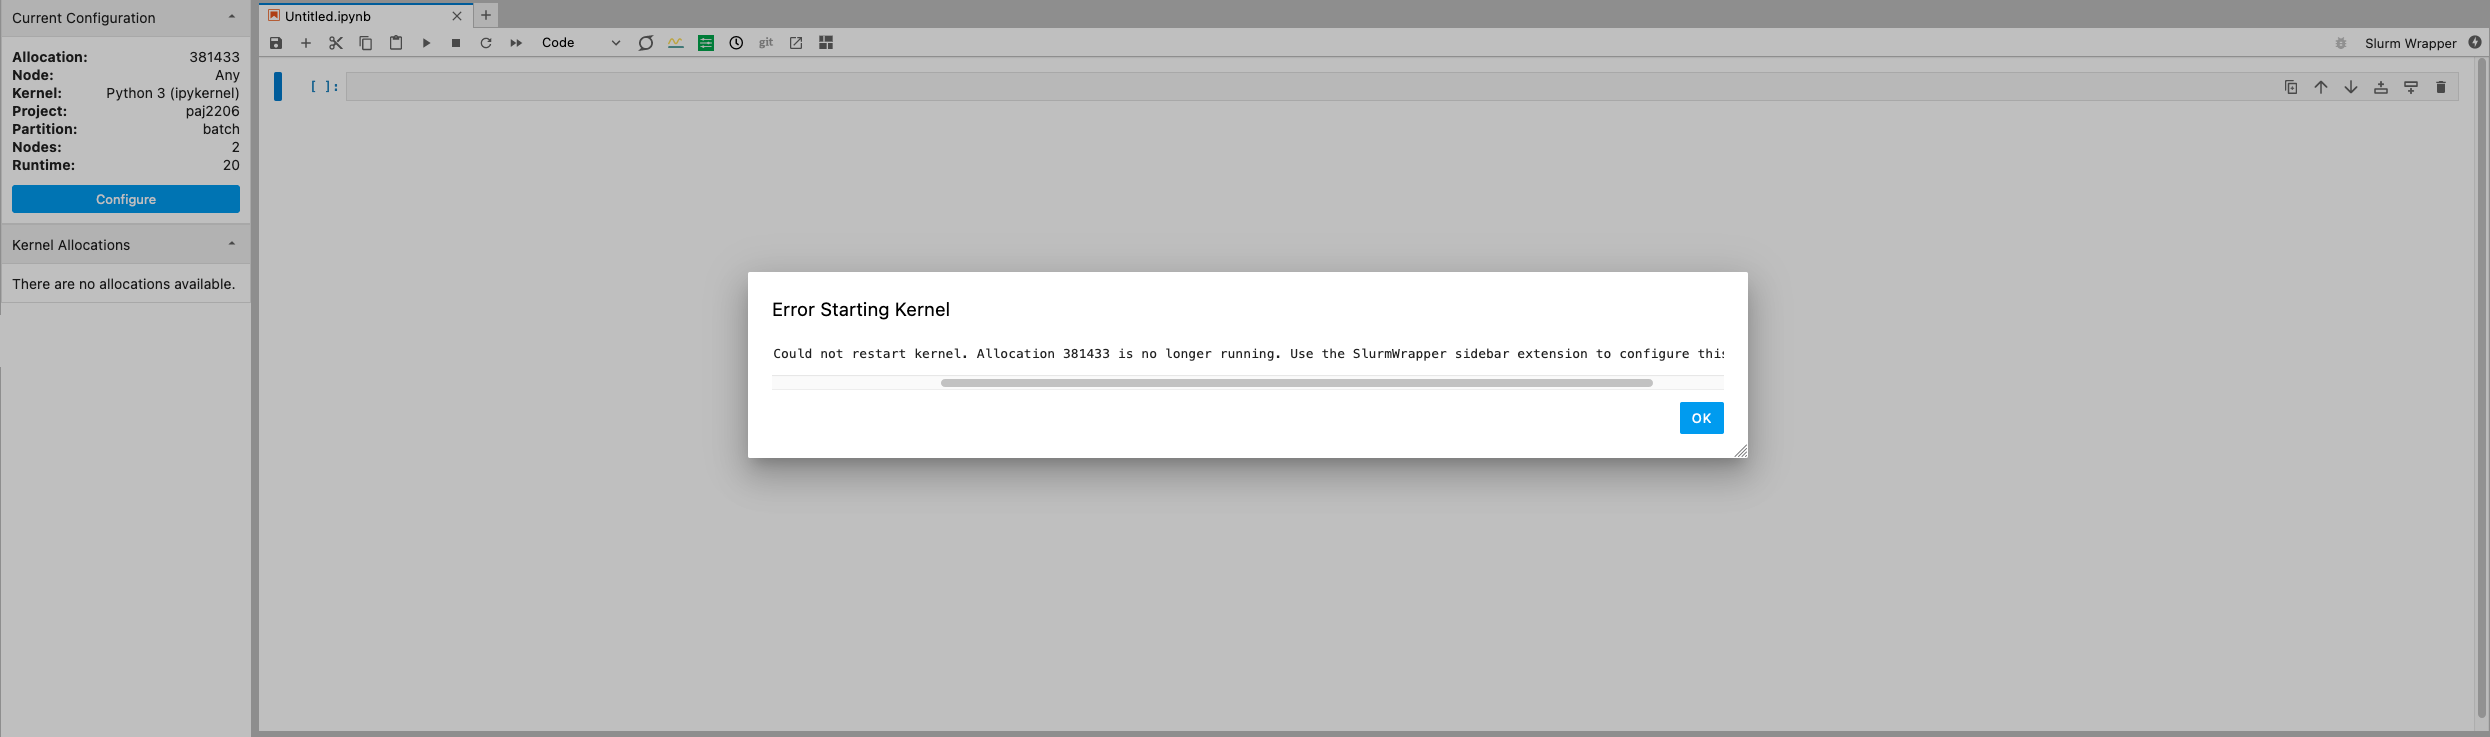

<div class="alert alert-danger">
Kernels <b>do not restart automatically</b> after you kernel allocation has ended.
</div>

Similarly, to prevent the case where an unused kernel allocation is idling but still using up your compute resources, a kernel allocation will be automatically killed if there is no kernel using an allocation for **10 seconds**.


<div class="alert alert-danger">
Kernels allocation are automatically killed after 10 seconds if not used!
</div>

#### Manually killing a kernel allocation

JupyterLab does not natively support stopping kernels which are in the process of starting and connecting. So as long as your kernel is waiting on its kernel allocation, you cannot shut it down via the regular JupyterLab interface in order to stop an allocation. To enable you to nevertheless cancel a kernel allocation, the "Kernel Allocations" section of the Slurm Wrapper sidebar tab has a "Kill" button next to each allocation. You can use it to cancel a kernel allocation no matter what its current state is.

Be aware that once you have stopped all kernels using a certain kernel allocation, the allocation will be automatically killed after 10 seconds, see [When and how will my kernel allocation end?](#When-and-how-will-my-kernel-allocation-end?)".